## Part 2 — Polynomial regression and interactions

## Objective
Capture nonlinear and interaction effects using polynomial feature engineering and an explicit bias term:
$$
\hat{L} = X * w + b.
$$

# Importing libraries 
For this part, first of all, you have to import the libraries that we are going to use in this notebook. We are going to use the following libraries:

- **pandas**: We are going to use this library for data manipulation and analysis.
- **numpy**: We are going to use this library for numerical computations.
- **matplotlib**: We are going to use this library for data visualization.

In [1]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the Dataset

In [3]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## 1. Dataset Visualization

The dataset contains observations of stellar properties: mass (M), temperature (T), and luminosity (L). Here is how it looks:

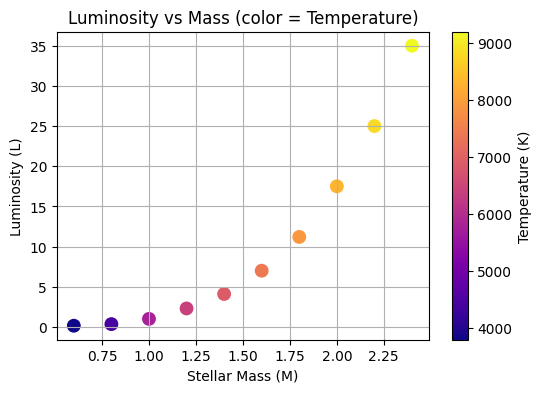

In [4]:
plt.figure(figsize=(6,4))
sc = plt.scatter(M, L, c=T, cmap='plasma', s=80)
plt.colorbar(sc, label="Temperature (K)")
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Luminosity vs Mass (color = Temperature)")
plt.grid(True)
plt.show()

## 2. Feature engineering

We create polynomial and interaction features to capture nonlinear relationships:

$$X = [M, T, M^2, M \cdot T]$$


In [11]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_full = np.column_stack((M, T, M**2, M*T))
y = L

print("First lines of X_full:")
print(X_full[:5])


First lines of X_full:
[[6.00e-01 3.80e+03 3.60e-01 2.28e+03]
 [8.00e-01 4.40e+03 6.40e-01 3.52e+03]
 [1.00e+00 5.80e+03 1.00e+00 5.80e+03]
 [1.20e+00 6.40e+03 1.44e+00 7.68e+03]
 [1.40e+00 6.90e+03 1.96e+00 9.66e+03]]


## 3. Model and Loss model
The prediction model is this one:
$$
\hat{L} = Xw + b
$$

and the loss model is the MSE

In [12]:
def predict(X, w, b):
    return X @ w + b

def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

## 4. Gradient Descent Optimization

To train our model, we use gradient descent to minimize the MSE loss function. The optimization process involves:

- **Cost function**: Computes the mean squared error between predictions and actual values
- **Gradients**: Calculate partial derivatives with respect to weights (w) and bias (b)
- **Update rule**: Adjust parameters in the direction that reduces loss by step size α

This iterative approach finds optimal weights and bias that best fit the nonlinear stellar data.

In [14]:
def compute_cost(X, y, w, b):
    m = len(y)
    errors = predict(X, w, b) - y
    return (1/(2*m)) * np.sum(errors**2)

def compute_gradients(X, y, w, b):
    m = len(y)
    errors = predict(X, w, b) - y
    dw = (1/m) * (X.T @ errors)
    db = (1/m) * np.sum(errors)
    return dw, db


Here is a general formula for the polynomial regression model with interaction and bias term used in this notebook:

$$
\hat{L} = w_1 M + w_2 T + w_3 M^2 + w_4 (M \cdot T) + b
$$


In [15]:
def gradient_descent(X, y, w, b, alpha, epochs):
    losses = []

    for _ in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        losses.append(compute_cost(X, y, w, b))

    return w, b, losses


## 5. Feature selection experiment

In this example, we will compare different sets of input features and how polynomial terms and interactions influence the performance of the models. This will help us understand the effect on the accuracy of the models and the importance of the features for modeling the luminosity of the stars.


M1 [M, T]
w = [18.8970042  -8.80632548]
b = 10.35999999999992
Final Loss = 5.430773545614949


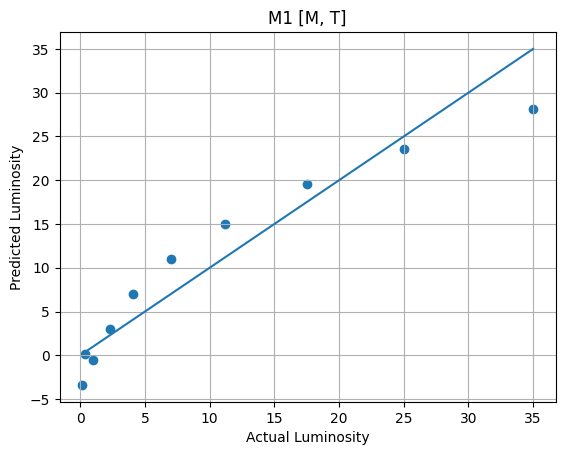


M2 [M, T, M^2]
w = [ 1.98380235 -7.2757813  15.8422038 ]
b = 10.35999999999991
Final Loss = 1.0050732552182848


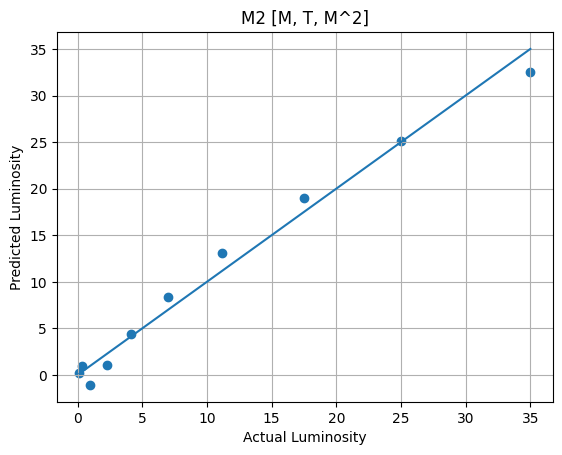


M3 [M, T, M^2, M*T]
w = [-0.0869086  -8.14065702 12.57352621  6.16690459]
b = 10.35999999999991
Final Loss = 0.980043803357895


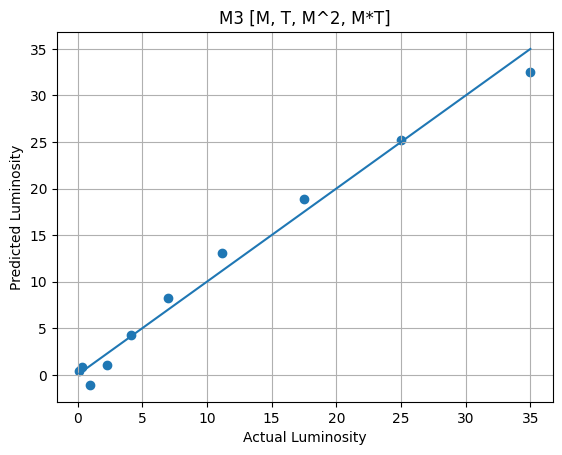

In [16]:
models = {
    "M1 [M, T]": np.column_stack((M, T)),
    "M2 [M, T, M^2]": np.column_stack((M, T, M**2)),
    "M3 [M, T, M^2, M*T]": np.column_stack((M, T, M**2, M*T))
}

results = {}

alpha = 0.01    
epochs = 5000

for name, X_model in models.items():
    X_norm, mu, sigma = normalize_features(X_model)

    w = np.zeros(X_norm.shape[1])
    b = 0.0

    w_final, b_final, losses = gradient_descent(X_norm, y, w, b, alpha, epochs)
    final_loss = losses[-1]

    results[name] = (w_final, b_final, final_loss, mu, sigma)

    print(f"\n{name}")
    print("w =", w_final)
    print("b =", b_final)
    print("Final Loss =", final_loss)

    preds = predict(X_norm, w_final, b_final)

    plt.figure()
    plt.scatter(y, preds)
    plt.plot([min(y), max(y)], [min(y), max(y)])
    plt.xlabel("Actual Luminosity")
    plt.ylabel("Predicted Luminosity")
    plt.title(name)
    plt.grid(True)
    plt.show()


## 6. Gradient Descent and Convergence
We will train the polynomial regression model using the gradient descent optimization algorithm. We will specifically train the most complex model, M3, which includes all the features: mass (M), temperature (T), mass squared (M²), and the interaction term (M·T).

**How Gradient Descent Works:**
- It starts by initializing the parameters with random values
- It calculates the rate at which the loss function changes with respect to the parameters
- It adjusts the parameters to minimize the loss
- This process is repeated until the algorithm converges

In the following cells, we will present the training convergence graph, the effect of the interaction coefficient on the model, and the predictions made by the algorithm on the stellar observations.


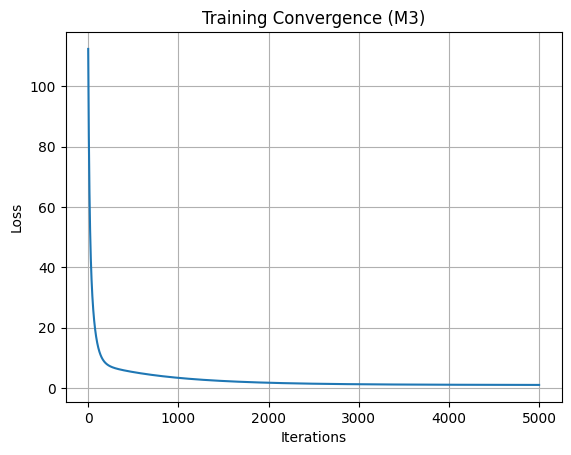

In [17]:
X = models["M3 [M, T, M^2, M*T]"]
X_norm, mu, sigma = normalize_features(X)

w = np.zeros(X_norm.shape[1])
b = 0

w_trained, b_trained, losses = gradient_descent(X_norm, y, w, b, alpha, epochs)

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Convergence (M3)")
plt.grid(True)
plt.show()



## 7. Cost vs Interaction Coefficient

In this section, the impact of the interaction weight $w_{M \cdot T}$ on the cost of the model is discussed. The interaction weight is the weight of the interaction term $M \cdot T$. The impact of the interaction weight on the cost of the model can be visualized by varying the interaction weight from the trained weight. 

- **X-axis**: Different weights of the interaction term
- **Y-axis**: Corresponding cost
- **Optimal point**: The weight of the interaction term is 6.167, which is the trained weight. The cost is the lowest at this point. 

The interaction term is important in the model for the non-linear relationship between the stellar mass and temperature.


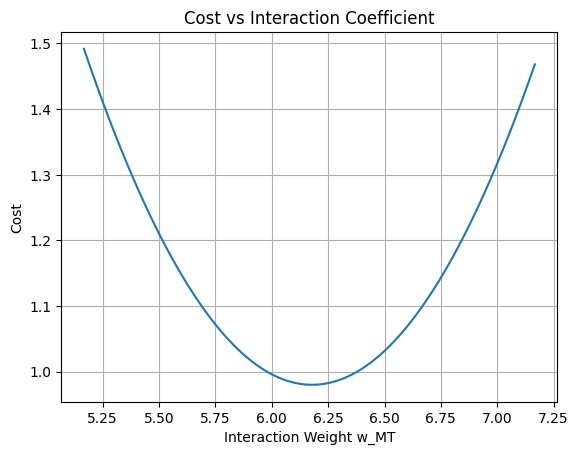

In [18]:
w_base = w_trained.copy()
b_base = b_trained

w_mt_values = np.linspace(w_base[3] - 1, w_base[3] + 1, 100)
costs = []

for val in w_mt_values:
    w_temp = w_base.copy()
    w_temp[3] = val
    costs.append(compute_cost(X_norm, y, w_temp, b_base))

plt.plot(w_mt_values, costs)
plt.xlabel("Interaction Weight w_MT")
plt.ylabel("Cost")
plt.title("Cost vs Interaction Coefficient")
plt.grid(True)
plt.show()



## 8. Inference Demo

In [19]:
M_new = 1.3
T_new = 6600

X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])
X_new_norm = (X_new - mu) / sigma

L_pred_new = predict(X_new_norm, w_trained, b_trained)

print("Predicted Luminosity for new star:", L_pred_new)


Predicted Luminosity for new star: 2.7271355079684483


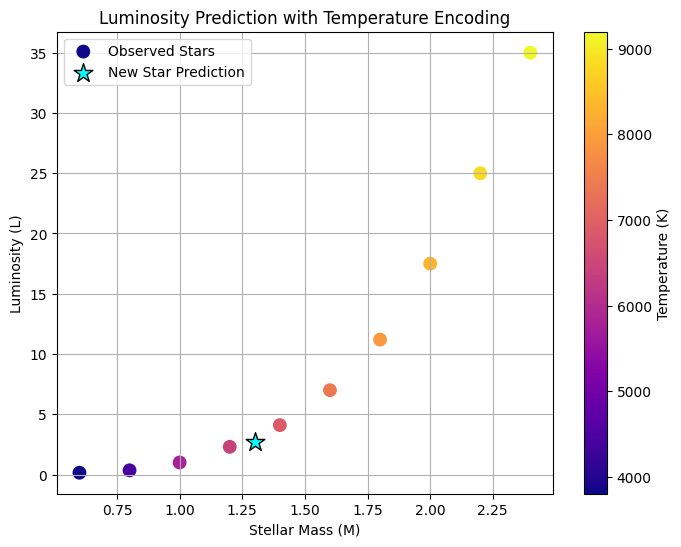

In [20]:
plt.figure(figsize=(8,6))

sc = plt.scatter(M, L, c=T, cmap='plasma', s=80, label="Observed Stars")

plt.scatter(M_new, L_pred_new, 
            color='cyan', edgecolor='black', 
            s=200, marker='*', label="New Star Prediction")

plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Luminosity Prediction with Temperature Encoding")

cbar = plt.colorbar(sc)
cbar.set_label("Temperature (K)")

plt.legend()
plt.grid(True)
plt.show()


## Reasonableness Analysis

For a star with M=1.3 and T=6600 K:

**Data context:**
- Mass: Between 1.2 and 1.4 in our dataset
- Temperature: Between 6400 K and 6900 K in our dataset
- Expected L range: Should interpolate between 2.30 and 4.10 L☉

**Model prediction:** L ≈ 2.73 

The prediction falls within the expected range, confirming the model generalizes reasonably for interpolation within the training domain. This is consistent with the empirical mass-luminosity relation for main-sequence stars, where a star slightly more massive than our data points (M=1.3) yields luminosity appropriately positioned in the observed pattern.
